In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28*28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [29]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

C:\Users\stepg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8908 - loss: 0.3801 - val_accuracy: 0.9527 - val_loss: 0.1758
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9542 - loss: 0.1569 - val_accuracy: 0.9603 - val_loss: 0.1383
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9679 - loss: 0.1100 - val_accuracy: 0.9631 - val_loss: 0.1248
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9749 - loss: 0.0849 - val_accuracy: 0.9675 - val_loss: 0.1076
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9811 - loss: 0.0646 - val_accuracy: 0.9697 - val_loss: 0.0992
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0510 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9888 - loss: 0.0401 - val_accuracy: 0.9750 - val_loss: 0.0903
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9909 - loss: 0.0323 - val_accuracy: 0.

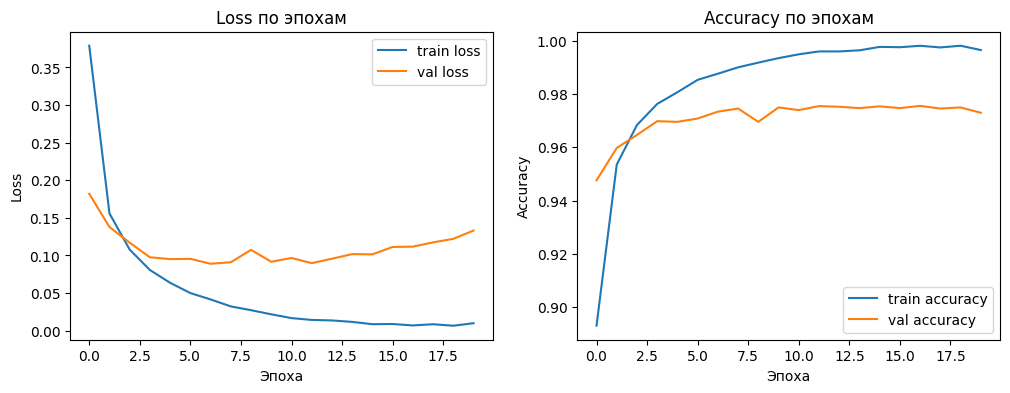

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history.get('val_loss', []), label='val loss')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss по эпохам')

plt.subplot(1,2,2)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='val accuracy')
    plt.xlabel('Эпоха')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy по эпохам')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.1115
Точность на тестовом наборе: 0.975
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


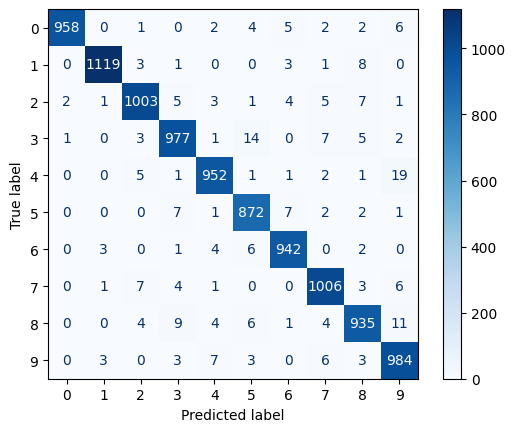

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовом наборе: {test_acc:.3f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

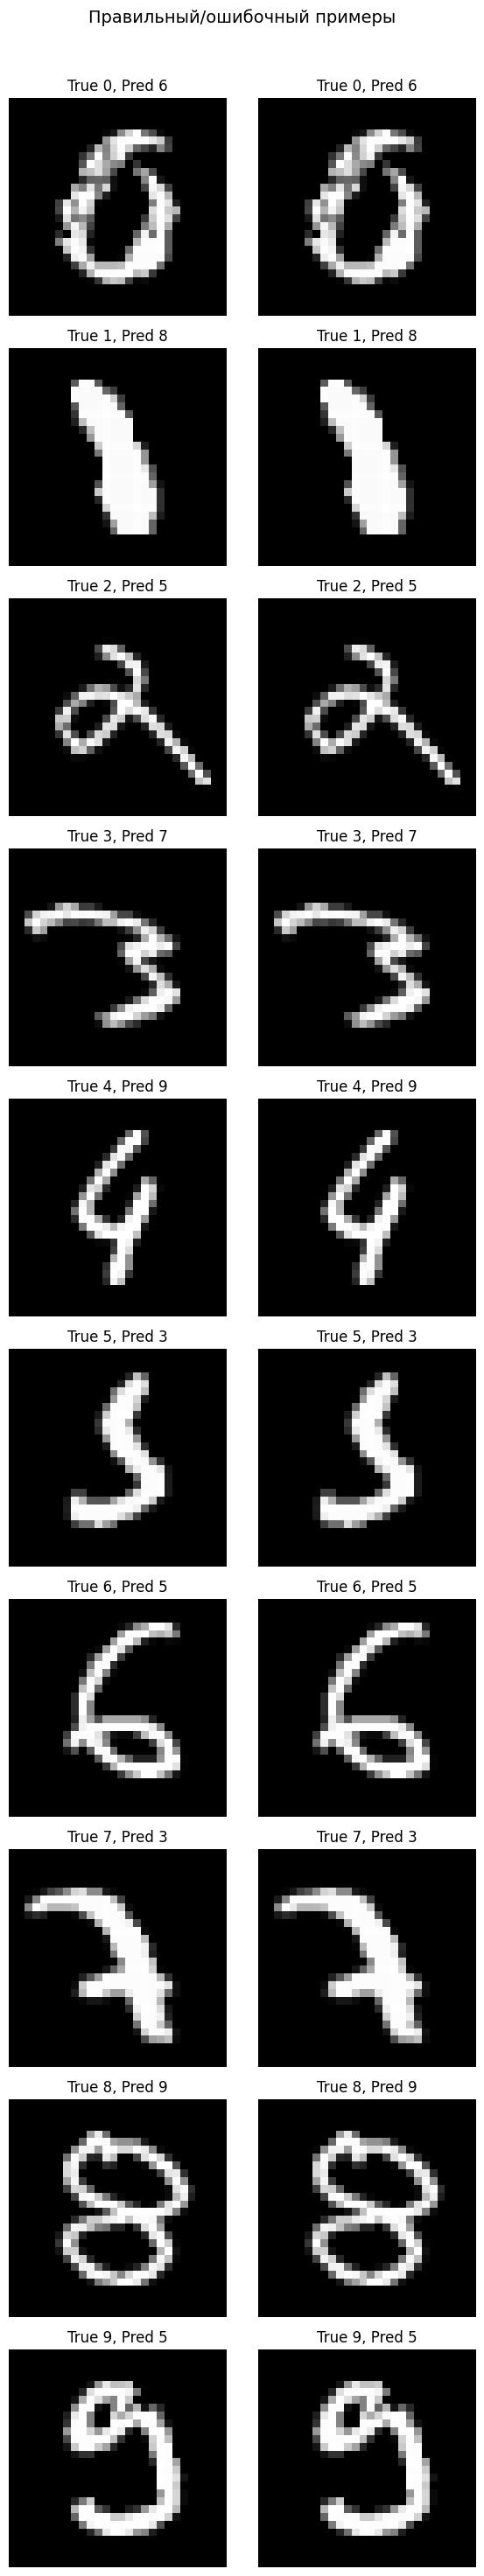

In [32]:
examples = []
for cls in range(10):
    mis_cls_idx = np.where((y_true == cls) & (y_pred_classes != cls))[0]
    corr_cls_idx = np.where((y_true == cls) & (y_pred_classes == cls))[0]
    ex_mis = mis_cls_idx[0] if len(mis_cls_idx)>0 else None
    ex_corr = mis_cls_idx[0] if len(corr_cls_idx)>0 else None
    examples.append((cls, ex_corr, ex_mis))

fig, axs = plt.subplots(10, 2, figsize=(6, 30))
for i, (cls, ex_corr, ex_mis) in enumerate(examples):
    if ex_corr is not None:
        axs[i,0].imshow(X_test[ex_corr].reshape(28,28), cmap='gray')
        axs[i,0].set_title(f"True {cls}, Pred {y_pred_classes[ex_corr]}")
    else:
        axs[i,0].text(0.5,0.5,"No correct example", ha='center')
    if ex_mis is not None:
        axs[i,1].imshow(X_test[ex_mis].reshape(28,28), cmap='gray')
        axs[i,1].set_title(f"True {cls}, Pred {y_pred_classes[ex_mis]}")
    else:
        axs[i,1].text(0.5,0.5,"No misclassificated example", ha='center')

    axs[i,0].axis('off'); axs[i,1].axis('off')

plt.suptitle('Правильный/ошибочный примеры', fontsize=14)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()